In [1]:
from datetime import datetime
from ria import *
from scipy import stats
from scipy.optimize import curve_fit
import csv
import fnmatch
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# Box 15 Analysis

In [3]:
directory = r"C:\Users\utente\OneDrive\Desktop\SCHOOL FILES\ERASMUS MUNDUS RADMEP\UJM\Radiation to Photonics\Line15"

In [83]:
def ria_curve_fit(dists, data):
    slopes = []
    a = 0
    for i, (dist, dat) in enumerate(zip(dists, data)):
        linfit = curve_fit(lambda x, m, b: m * x + b, dist, dat)[0]
        slope = linfit[0]

        if i == 0:
            a = slope
            slopes.append(0)
        else:
            slope_ = a - slope
            slopes.append(slope_)
    return slopes

def linfit(dist, dat):
    linfit_ = curve_fit(lambda x, m, b: m * x + b, dist, dat)[0]
    return linfit_[0], linfit_[1]

## $\lambda$ = 1310 nm

In [7]:
wav1 = 1310
u1 = wave_data(wav1, 15, directory, True, True)
dat1 = u1.data
time1 = np.array(u1.times) # in minutes
dist1 = np.array(u1.distances) # in m

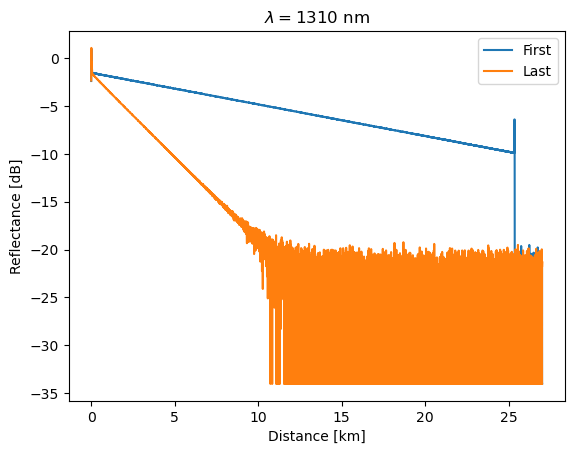

In [9]:
plt.plot(dist1[0]*1e-3, dat1[0], label = "First")
plt.plot(dist1[-1]*1e-3, dat1[-1], label = "Last")
plt.xlabel("Distance [km]")
plt.ylabel("Reflectance [dB]")
plt.title(r"$\lambda = {}$ nm".format(wav1))
plt.legend()
plt.show()

Text(0, 0.5, 'Reflectance [dB]')

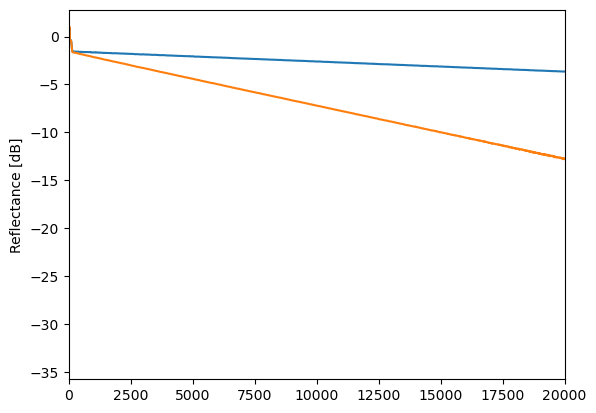

In [11]:
plt.plot(dat1[0])
plt.plot(dat1[-1])
plt.xlim(0, 20000)
# plt.ylim(-5, 2)
plt.ylabel("Reflectance [dB]")

In [13]:
cover1 = [175, 20000]
slopes1 = ria_curve_fit(dist1[:, cover1[0]:cover1[1]+1], dat1[:, cover1[0]:cover1[1]+1])
print(r"Cover window for wavelength = {}: {} - {} km".format(wav1, 1e-3 * dist1[0, cover1[0]], 1e-3 * dist1[0, cover1[1]]))

Cover window for wavelength = 1310: 0.0559552875 - 6.394889999999999 km


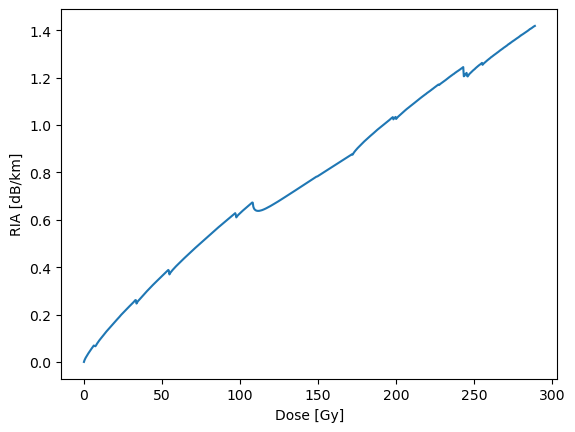

In [17]:
dose_rate = 105.56e-6 # Gy/s
time1_s = time1 * 60
plt.plot(time1_s * dose_rate, np.array(slopes1) * 1e3)
plt.xlabel("Dose [Gy]")
plt.ylabel("RIA [dB/km]")
plt.show()

In [55]:
np.round(1.22222, 2)

1.22

In [49]:
mid1 = int((cover1[0] + cover1[1]) / 2)

In [69]:
dist1[0, mid1]

3225.2627715

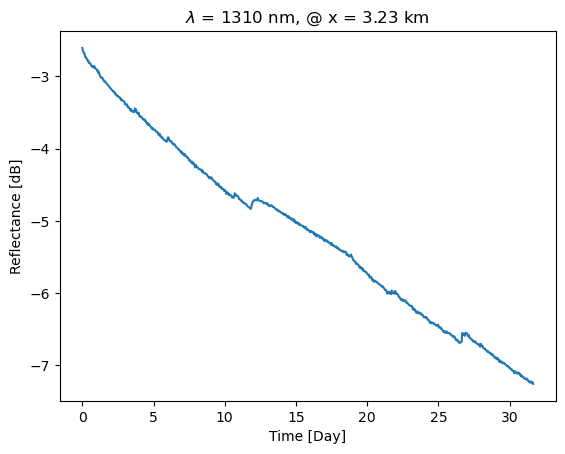

In [71]:
plt.plot(time1 / (60 * 24), dat1[:, mid1])
plt.xlabel("Time [Day]")
plt.ylabel("Reflectance [dB]")
plt.title(r"$\lambda$ = {} nm, @ x = {} km".format(wav1, np.round(dist1[0, mid1] * 1e-3, 2)))
plt.show()

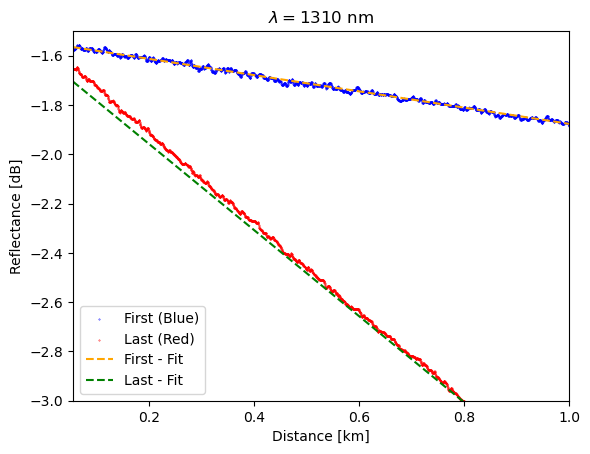

In [127]:
a1, b1 = linfit(dist1[0][cover1[0]:cover1[1]], dat1[0][cover1[0]:cover1[1]])
a2, b2 = linfit(dist1[-1][cover1[0]:cover1[1]], dat1[-1][cover1[0]:cover1[1]])


# plt.plot(dist1[0][cover1[0]:cover1[1]]*1e-3, a1 * dist1[0][cover1[0]:cover1[1]] + b1, label = "First", linestyle = "--")
# plt.plot(dist1[-1][cover1[0]:cover1[1]]*1e-3, a2 * dist1[-1][cover1[0]:cover1[1]] + b2, label = "First")

plt.scatter(dist1[0][cover1[0]:cover1[1]]*1e-3, dat1[0][cover1[0]:cover1[1]], label = "First (Blue)", s = 0.1, color = "blue")
plt.scatter(dist1[-1][cover1[0]:cover1[1]]*1e-3, dat1[-1][cover1[0]:cover1[1]], label = "Last (Red)", s = 0.1, color = "red")

plt.plot(dist1[0][cover1[0]:cover1[1]]*1e-3, a1 * dist1[0][cover1[0]:cover1[1]] + b1, label = "First - Fit", linestyle = "--", color = "orange")
plt.plot(dist1[-1][cover1[0]:cover1[1]]*1e-3, a2 * dist1[-1][cover1[0]:cover1[1]] + b2, label = "Last - Fit", linestyle = "--", color = "green")
plt.xlabel("Distance [km]")
plt.ylabel("Reflectance [dB]")
plt.title(r"$\lambda = {}$ nm".format(wav1))
plt.xlim(0.0559552875, 1)
plt.ylim(-3, -1.5)
# plt.ylim
plt.legend()
plt.show()

In [95]:
np.min(dist1[0][cover1[0]:cover1[1]]*1e-3)

0.0559552875

## $\lambda$ = 1550 nm

In [19]:
wav2 = 1550
u2 = wave_data(wav2, 15, directory, True, True)

dat2 = u2.data
time2 = np.array(u2.times) # in minutes
dist2 = np.array(u2.distances) # in m

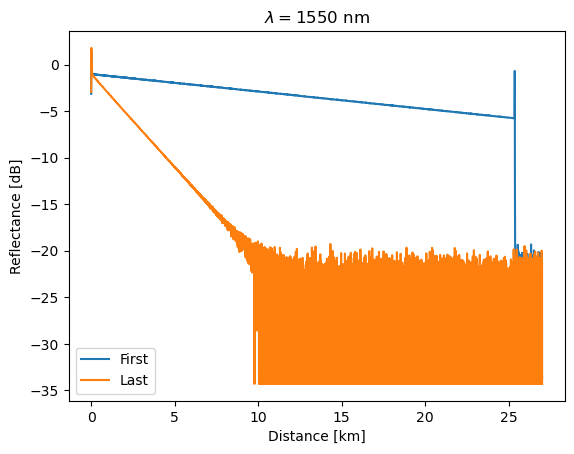

In [21]:
plt.plot(dist2[0]*1e-3, dat2[0], label = "First")
plt.plot(dist2[-1]*1e-3, dat2[-1], label = "Last")
plt.xlabel("Distance [km]")
plt.ylabel("Reflectance [dB]")
plt.title(r"$\lambda = {}$ nm".format(wav2))
plt.legend()
plt.show()

Text(0, 0.5, 'Reflectance [dB]')

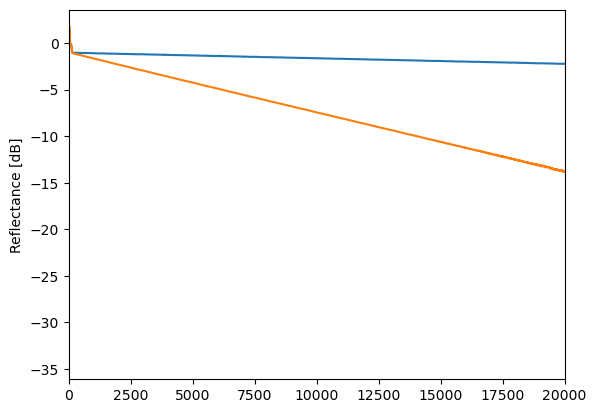

In [75]:
plt.plot(dat2[0])
plt.plot(dat2[-1])
plt.xlim(0, 20000)
# plt.ylim(-5, 2)
plt.ylabel("Reflectance [dB]")

In [25]:
cover2 = [175, 20000]
slopes2 = ria_curve_fit(dist2[:, cover2[0]:cover2[1]+1], dat2[:, cover2[0]:cover2[1]+1])
print(r"Cover window for wavelength = {}: {} - {} km".format(wav2, 1e-3 * dist2[0, cover2[0]], 1e-3 * dist2[0, cover2[1]]))

Cover window for wavelength = 1550: 0.0559552875 - 6.394889999999999 km


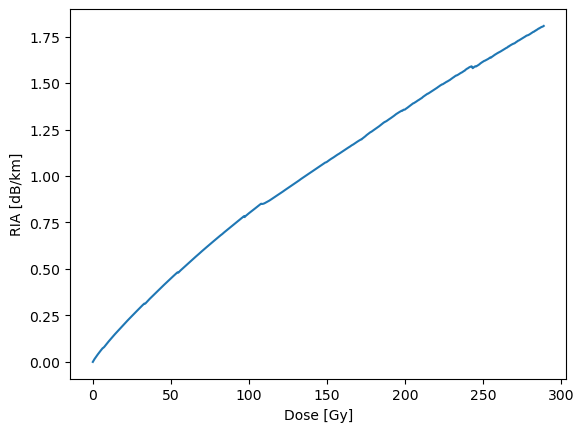

In [27]:
dose_rate = 105.56e-6 # Gy/s
time2_s = time2 * 60
plt.plot(time2_s * dose_rate, np.array(slopes2) * 1e3)
plt.xlabel("Dose [Gy]")
plt.ylabel("RIA [dB/km]")
plt.show()

## $\lambda$ = 1625 nm

In [29]:
wav3 = 1625
u3 = wave_data(wav3, 15, directory, True, True)

dat3 = u3.data
time3 = np.array(u3.times) # in minutes
dist3 = np.array(u3.distances) # in m

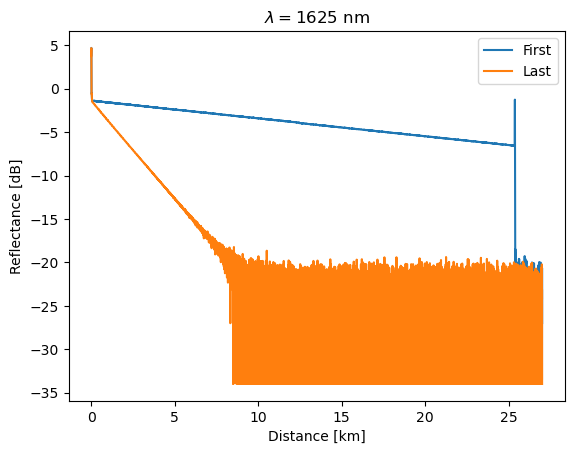

In [31]:
plt.plot(dist3[0]*1e-3, dat3[0], label = "First")
plt.plot(dist3[-1]*1e-3, dat3[-1], label = "Last")
plt.xlabel("Distance [km]")
plt.ylabel("Reflectance [dB]")
plt.title(r"$\lambda = {}$ nm".format(wav3))
plt.legend()
plt.show()

Text(0, 0.5, 'Reflectance [dB]')

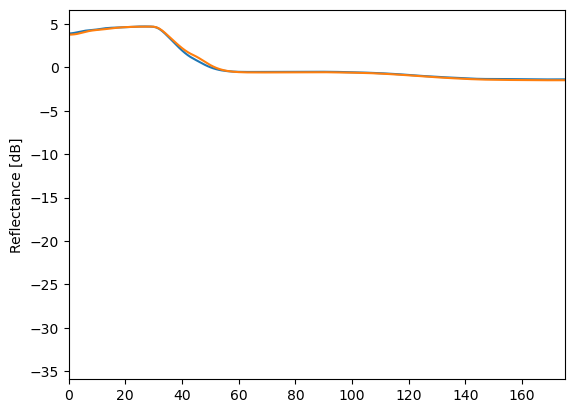

In [33]:
plt.plot(dat3[0])
plt.plot(dat3[-1])
plt.xlim(0, 175)
# plt.xlim(175, 15000)
# plt.ylim(-13, -10)
plt.ylabel("Reflectance [dB]")

In [35]:
cover3 = [175, 15000]
slopes3 = ria_curve_fit(dist3[:, cover3[0]:cover3[1]+1], dat3[:, cover3[0]:cover3[1]+1])
print(r"Cover window for wavelength = {}: {} - {} km".format(wav3, 1e-3 * dist3[0, cover3[0]], 1e-3 * dist3[0, cover3[1]]))

Cover window for wavelength = 1625: 0.0559552875 - 4.796167499999999 km


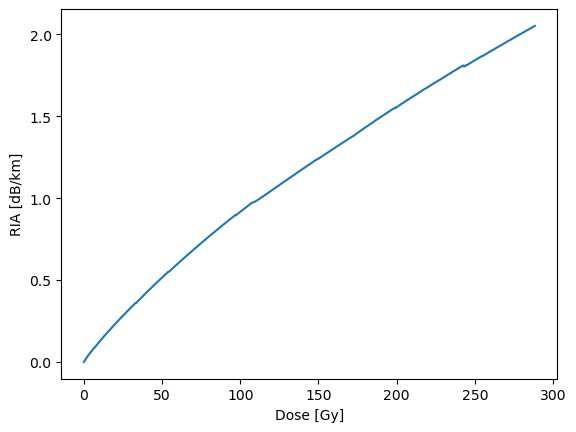

In [37]:
dose_rate = 105.56e-6 # Gy/s
time3_s = time3 * 60
plt.plot(time3_s * dose_rate, np.array(slopes3) * 1e3)
plt.xlabel("Dose [Gy]")
plt.ylabel("RIA [dB/km]")
plt.show()

## All wavelengths

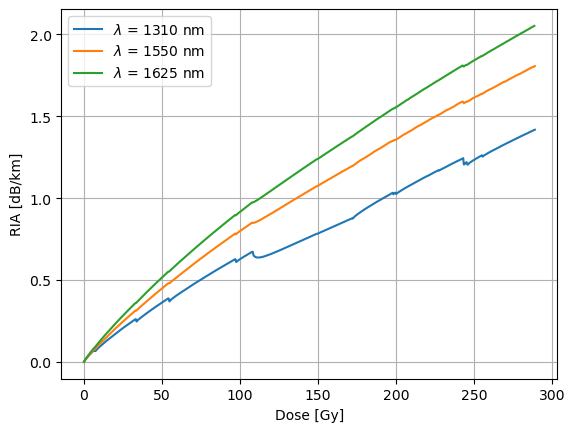

In [45]:
dose_rate = 105.56e-6 # Gy/s

time1_s = time1 * 60
plt.plot(time1_s * dose_rate, np.array(slopes1) * 1e3, label = r"$\lambda$ = {} nm".format(wav1))

time2_s = time2 * 60
plt.plot(time2_s * dose_rate, np.array(slopes2) * 1e3, label = r"$\lambda$ = {} nm".format(wav2))

time3_s = time3 * 60
plt.plot(time3_s * dose_rate, np.array(slopes3) * 1e3, label = r"$\lambda$ = {} nm".format(wav3))
plt.xlabel("Dose [Gy]")
plt.ylabel("RIA [dB/km]")
plt.legend()
plt.grid()
plt.show()